# 2次元データの整理

## 2つのデータの関係性の指標

In [17]:
import numpy as np
import pandas as pd

# NumPyの表示精度を設定
np.set_printoptions(precision=3)

# Pandasの表示精度を設定
pd.set_option('display.float_format', '{:.3f}'.format)

try:
    get_ipython().run_line_magic('precision', '3')
except NameError:
        pass  # Jupyter環境外では何もしない

In [18]:
df = pd.read_csv('../data/ch2_scores_em.csv',
                 index_col='生徒番号')

In [19]:
en_scores = np.array(df['英語'])[:10]
ma_scores = np.array(df['数学'])[:10]

scores_df = pd.DataFrame({'英語':en_scores,
                          '数学':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='生徒'))
scores_df

,英語,数学
生徒,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 共分散

In [20]:
summary_df = scores_df.copy()
summary_df['英語の偏差'] =\
    summary_df['英語'] - summary_df['英語'].mean()
summary_df['数学の偏差'] =\
    summary_df['数学'] - summary_df['数学'].mean()
summary_df['偏差同士の積'] =\
    summary_df['英語の偏差'] * summary_df['数学の偏差']
summary_df

,英語,数学,英語の偏差,数学の偏差,偏差同士の積
生徒,,,,,
A,42,65,-13.000,-6.400,83.200
B,69,80,14.000,8.600,120.400
C,56,63,1.000,-8.400,-8.400
D,41,63,-14.000,-8.400,117.600
E,57,76,2.000,4.600,9.200
F,48,60,-7.000,-11.400,79.800
G,65,81,10.000,9.600,96.000
H,49,66,-6.000,-5.400,32.400
I,65,78,10.000,6.600,66.000


In [21]:
summary_df['偏差同士の積'].mean()

62.800

In [22]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [23]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

In [24]:
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [25]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

### 相関係数

In [26]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.819

In [27]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [28]:
scores_df.corr()

,英語,数学
英語,1.000,0.819
数学,0.819,1.000


## 2次元データの視覚化

### 散布図

In [29]:
import matplotlib.pyplot as plt

%matplotlib inline

/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


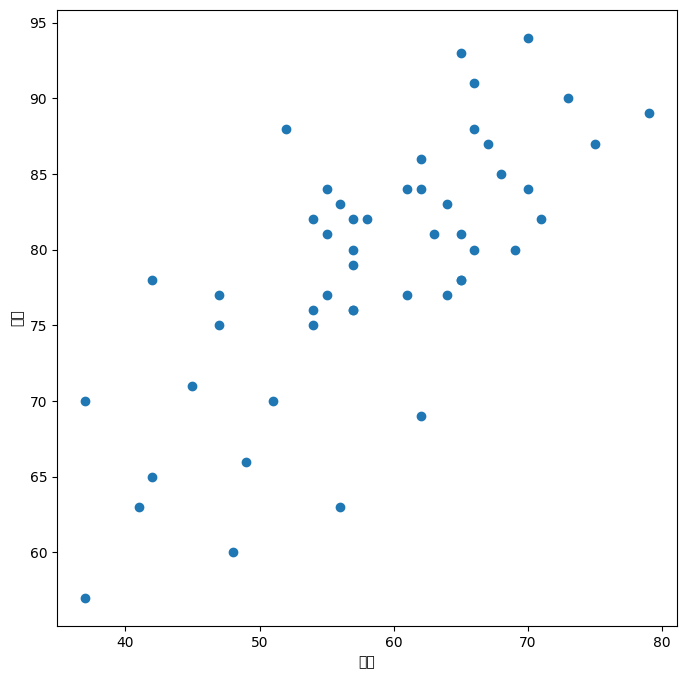

In [30]:
english_scores = np.array(df['英語'])
math_scores = np.array(df['数学'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 散布図
ax.scatter(english_scores, math_scores)
ax.set_xlabel('英語')
ax.set_ylabel('数学')

plt.show()

### 回帰直線

/Users/bara/python_stat_sample/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


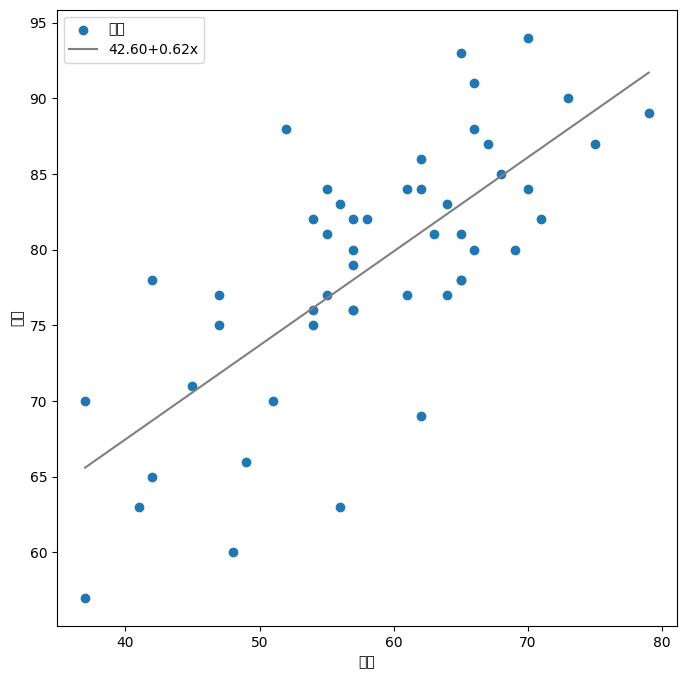

In [31]:
# 係数β_0とβ_1を求める
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 xを返す関数を作る
poly_1d = np.poly1d(poly_fit)
# 直線を描画するためのx座標を作る
xs = np.linspace(english_scores.min(), english_scores.max())
# xsに対応するy座標を求める
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='点数')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('英語')
ax.set_ylabel('数学')
# 凡例の表示
ax.legend(loc='upper left')

plt.show()

### ヒートマップ

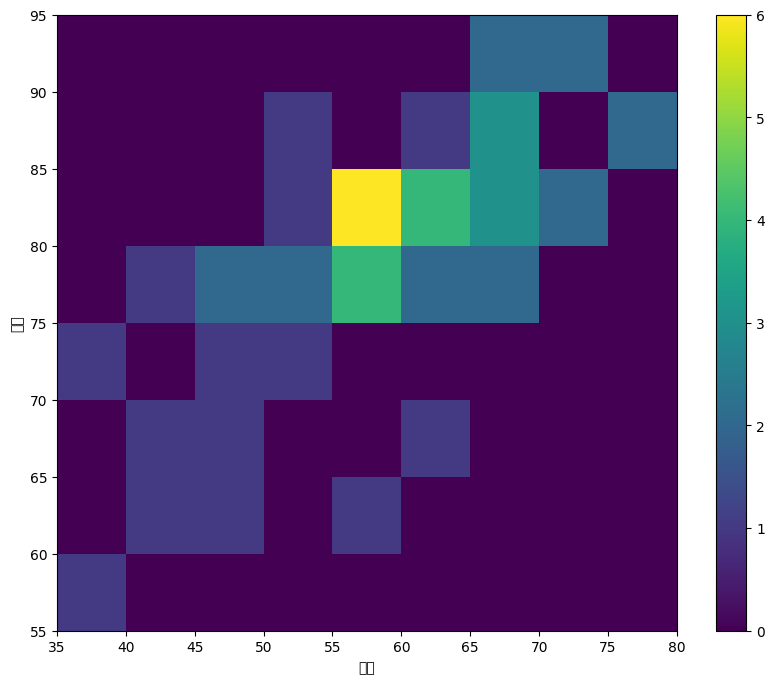

In [32]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('英語')
ax.set_ylabel('数学')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# カラーバーの表示
fig.colorbar(c[3], ax=ax)
plt.show()

## アンスコムの例

In [33]:
# npy形式で保存されたNumPy arrayを読み込む
anscombe_data = np.load('../data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [34]:
stats_df = pd.DataFrame(index=['Xの平均', 'Xの分散', 'Yの平均',
                               'Yの分散', 'XとYの相関係数',
                               'XとYの回帰直線'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
Xの平均,9.00,9.00,9.00,9.00
Xの分散,10.00,10.00,10.00,10.00
Yの平均,7.50,7.50,7.50,7.50
Yの分散,3.75,3.75,3.75,3.75
XとYの相関係数,0.82,0.82,0.82,0.82
XとYの回帰直線,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


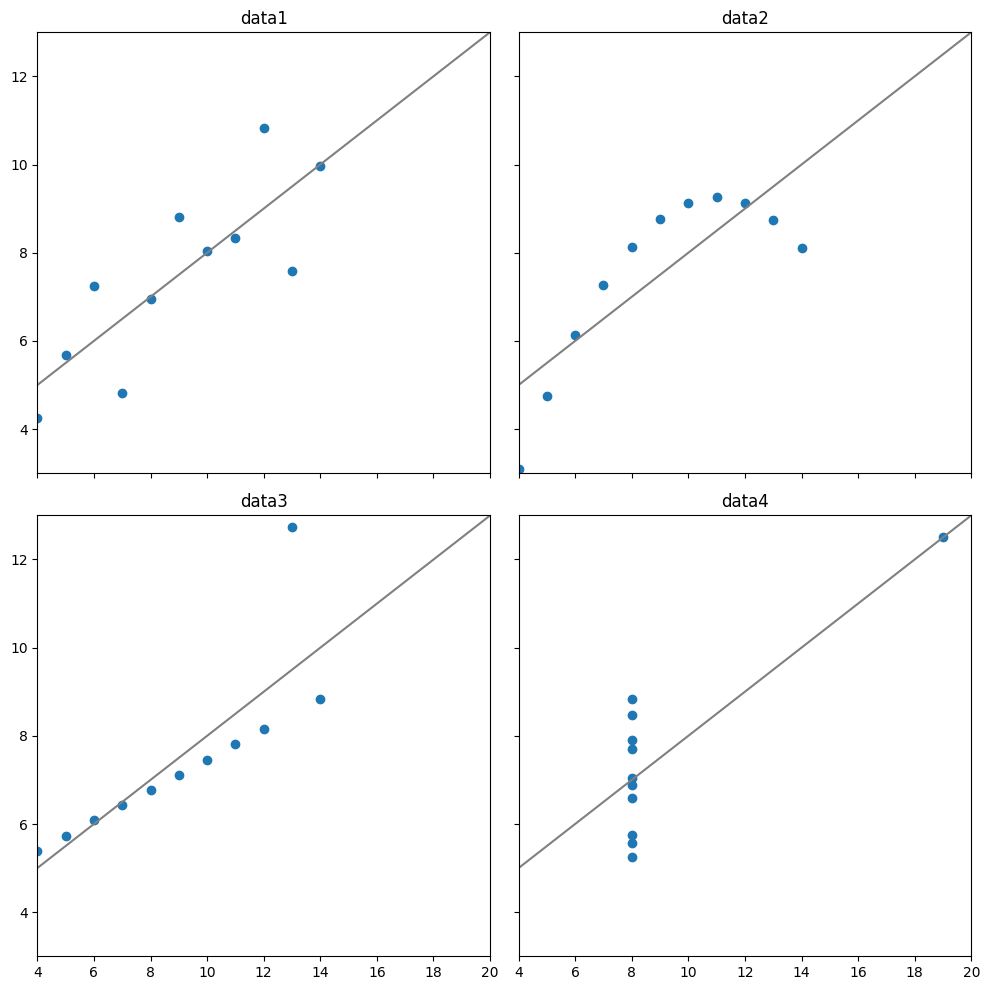

In [35]:
# グラフを描画する領域を2×2個作る
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 描画する領域の選択
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # タイトルをつける
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# グラフ同士の間隔を狭くする
plt.tight_layout()
plt.show()